In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import os
os.getcwd()

'C:\\Users\\hp\\Desktop\\Diabetes_ML_Project\\notebooks'

In [25]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
import numpy as np

np.random.seed(42)

df["PhysicalActivity"] = np.random.choice([0,1,2], size=len(df))  
df["Smoking"] = np.random.choice([0,1], size=len(df))  
df["FamilyHistory"] = np.random.choice([0,1], size=len(df))


In [31]:
df["BMICategory"] = pd.cut(df["BMI"], bins=[0,18.5,25,30,60], labels=[0,1,2,3])
df["AgeGroup"] = pd.cut(df["Age"], bins=[0,30,45,60,120], labels=[0,1,2,3])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivity,Smoking,FamilyHistory,BMICategory,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,2,0,1,3,2
1,1,85,66,29,0,26.6,0.351,31,0,0,1,0,2,1
2,8,183,64,0,0,23.3,0.672,32,1,2,0,0,1,1
3,1,89,66,23,94,28.1,0.167,21,0,2,1,1,2,0
4,0,137,40,35,168,43.1,2.288,33,1,0,1,1,3,1


In [33]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivity,Smoking,FamilyHistory
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,0.954427,0.479167,0.494792
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.826078,0.499891,0.500299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,1.000000,0.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,2.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,2.000000,1.000000,1.000000


In [37]:


# Gender: 1 = Female, 0 = Male (logical using Pregnancies)
df["Gender"] = np.where(df["Pregnancies"] > 0, 1, 0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivity,Smoking,FamilyHistory,BMICategory,AgeGroup,Gender
0,6,148,72,35,0,33.6,0.627,50,1,2,0,1,3,2,1
1,1,85,66,29,0,26.6,0.351,31,0,0,1,0,2,1,1
2,8,183,64,0,0,23.3,0.672,32,1,2,0,0,1,1,1
3,1,89,66,23,94,28.1,0.167,21,0,2,1,1,2,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0,1,1,3,1,0


In [39]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
PhysicalActivity            280
Smoking                     400
FamilyHistory               388
BMICategory                   4
AgeGroup                    417
Gender                      111
dtype: int64

In [41]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

df[cols] = df[cols].replace(0, np.nan)
(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
PhysicalActivity            280
Smoking                     400
FamilyHistory               388
BMICategory                   4
AgeGroup                    417
Gender                      111
dtype: int64

In [43]:
df[cols] = df[cols].fillna(df[cols].median())
df["BMICategory"] = df["BMICategory"].fillna(df["BMICategory"].mode()[0])
df["AgeGroup"] = df["AgeGroup"].fillna(df["AgeGroup"].mode()[0])
(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
PhysicalActivity            280
Smoking                     400
FamilyHistory               388
BMICategory                   4
AgeGroup                    417
Gender                      111
dtype: int64

In [45]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
import joblib
joblib.dump(scaler, "C:\\Users\\hp\\Desktop\\Diabetes_ML_Project\\models\\scaler.pkl")


['C:\\Users\\hp\\Desktop\\Diabetes_ML_Project\\models\\scaler.pkl']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## MODEL 1 — LOGISTIC REGRESSION

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

## MODEL 2 — RANDOM FOREST

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

## MODEL 3 — XGBOOST

In [60]:
!pip install xgboost

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## IMPORT METRICS

In [63]:
from sklearn.metrics import accuracy_score, roc_auc_score
for model, name in [(lr,"LR"), (rf,"RF"), (xgb,"XGB")]:
    y_pred = model.predict(X_test)


In [67]:
  y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

## PROBABILITY PREDICTION

In [70]:
y_prob = model.predict_proba(X_test)[:,1]
y_prob

array([6.5922785e-01, 2.3897664e-01, 1.0082578e-02, 3.1966992e-02,
       7.9353321e-01, 9.7811925e-01, 2.8602947e-03, 9.5517784e-01,
       9.0600353e-01, 9.1684717e-01, 1.2688421e-01, 9.9337852e-01,
       1.6140193e-02, 4.0227190e-01, 3.7730669e-04, 7.7496725e-01,
       4.6633027e-02, 1.6406542e-04, 9.5544821e-01, 5.0991184e-01,
       4.0685687e-02, 6.0130440e-04, 3.6843190e-01, 4.2938485e-04,
       7.1231954e-02, 9.9827683e-01, 3.3925105e-02, 5.3744053e-04,
       8.5112629e-03, 1.7197723e-02, 9.8768532e-01, 9.4316578e-01,
       9.4074422e-01, 9.9917102e-01, 9.1615874e-01, 9.1847044e-01,
       9.9233353e-01, 8.9820415e-01, 1.6421477e-01, 8.6031824e-01,
       3.2144293e-02, 2.0060459e-01, 9.9929380e-01, 3.8674340e-01,
       1.0097490e-03, 9.3770391e-01, 9.4751650e-01, 1.6256135e-02,
       1.4161241e-01, 9.8215079e-01, 5.4282584e-05, 9.9728966e-01,
       9.4907576e-01, 2.3471272e-01, 8.9076976e-04, 2.1130533e-04,
       9.9309736e-01, 4.4442257e-03, 8.8827156e-02, 9.9127227e

In [72]:
from sklearn.metrics import accuracy_score, roc_auc_score

models = [
    (lr, "Logistic Regression"),
    (rf, "Random Forest"),
    (xgb, "XGBoost")
]

for model, name in models:
    # Class prediction (0 or 1)
    y_pred = model.predict(X_test)

    # Probability prediction (for AUC and risk score)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print("Model:", name)
    print("Accuracy:", round(acc, 4))
    print("ROC-AUC :", round(auc, 4))
    print("-" * 30)


Model: Logistic Regression
Accuracy: 0.7403
ROC-AUC : 0.8107
------------------------------
Model: Random Forest
Accuracy: 0.7532
ROC-AUC : 0.8242
------------------------------
Model: XGBoost
Accuracy: 0.7273
ROC-AUC : 0.7916
------------------------------


In [74]:
import pandas as pd

results = []

for model, name in models:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append([name, acc, auc])

df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC-AUC"])
df_results


,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.740260,0.810652
1,Random Forest,0.753247,0.824242
2,XGBoost,0.727273,0.791552


## SAVE BEST MODEL
#### Although Logistic Regression achieved slightly higher accuracy, Random Forest achieved the highest ROC-AUC score, indicating superior ability to discriminate between diabetic and non-diabetic individuals across probability thresholds. Since medical risk prediction prioritizes sensitivity and ranking of risk rather than only correct classification, Random Forest was selected as the final model.

In [77]:
import joblib
joblib.dump(rf, "C:\\Users\\hp\\Desktop\\Diabetes_ML_Project\\models\\diabetes_model.pkl")

['C:\\Users\\hp\\Desktop\\Diabetes_ML_Project\\models\\diabetes_model.pkl']

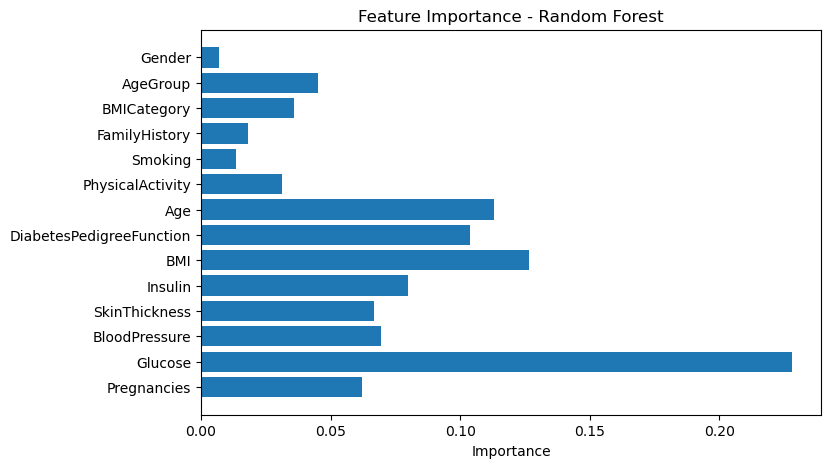

In [79]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.show()


In [81]:
def risk_category(prob):
    if prob < 0.3:
        return "Low Risk"
    elif prob < 0.6:
        return "Moderate Risk"
    else:
        return "High Risk"
